# 시계열 분석

In [1]:
from pandas import read_excel
from matplotlib import pyplot as plt
import seaborn as sb
import sys

### 1. 데이터 가져오기

- kings 데이터는 영국 왕 42명의 사망 나이 데이터 
- 비계절성을 띄는 시계열 자료
- 20번째 왕까지는 38~55세 수명 유지, 그 뒤는 수명이 늘어나서 40번쨰 왕은 73세까지 생존


In [2]:
df = read_excel('https://data.hossam.kr/E06/kings.xlsx')
df.head()


,age
0,60
1,43
2,67
3,50
4,56


In [3]:
plt.rcParams['font.family'] = "Malgun Gothic"
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (20,5)
plt.rcParams['axes.unicode_minus'] = False

### 2. 데이터 살펴보기

1) 기초 통계량


In [4]:
df.describe()

,age
count,42.000000
mean,55.285714
std,16.569566
min,13.000000
25%,44.000000
50%,56.000000
75%,67.750000
max,86.000000


2) 기본 형태의 시계열 그래프



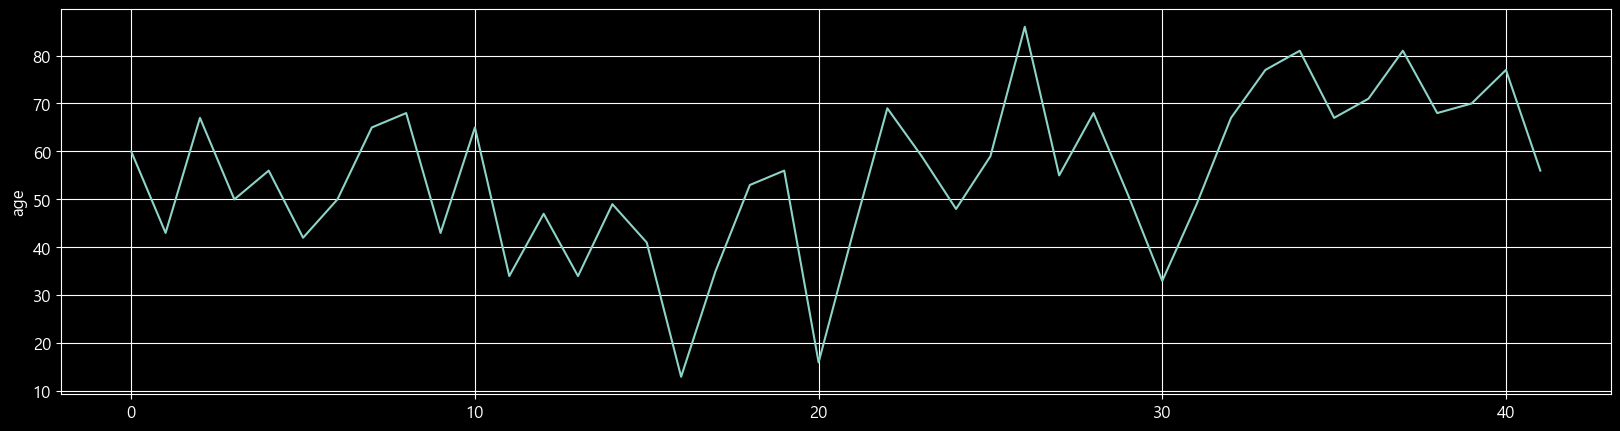

In [5]:
plt.figure()
sb.lineplot(df, x=df.index, y='age')
plt.grid()
plt.show()
plt.close()

### 3. 평균 이동



주어진 구간의 평균을 구해서 이어서 표시하는 방법

평균 이동 결과가 실제 데이터와 얼마나 차이가 나는지의 여부로 데이터를 판단 

### 1) 단순이동평균(SMA, Simple Moving Average)

- 가장 많이 사용하는 방식

In [6]:
# 3년, 6년, 9년 단위 평균

df['sma3'] = df['age'].rolling(3).mean()
df['sma6'] = df['age'].rolling(6).mean()
df['sma9'] = df['age'].rolling(9).mean()
df.head(13)

,age,sma3,sma6,sma9
0,60,NaN,NaN,NaN
1,43,NaN,NaN,NaN
2,67,56.666667,NaN,NaN
3,50,53.333333,NaN,NaN
4,56,57.666667,NaN,NaN
5,42,49.333333,53.000000,NaN
6,50,49.333333,51.333333,NaN
7,65,52.333333,55.000000,NaN
8,68,61.000000,55.166667,55.666667
9,43,58.666667,54.000000,53.777778


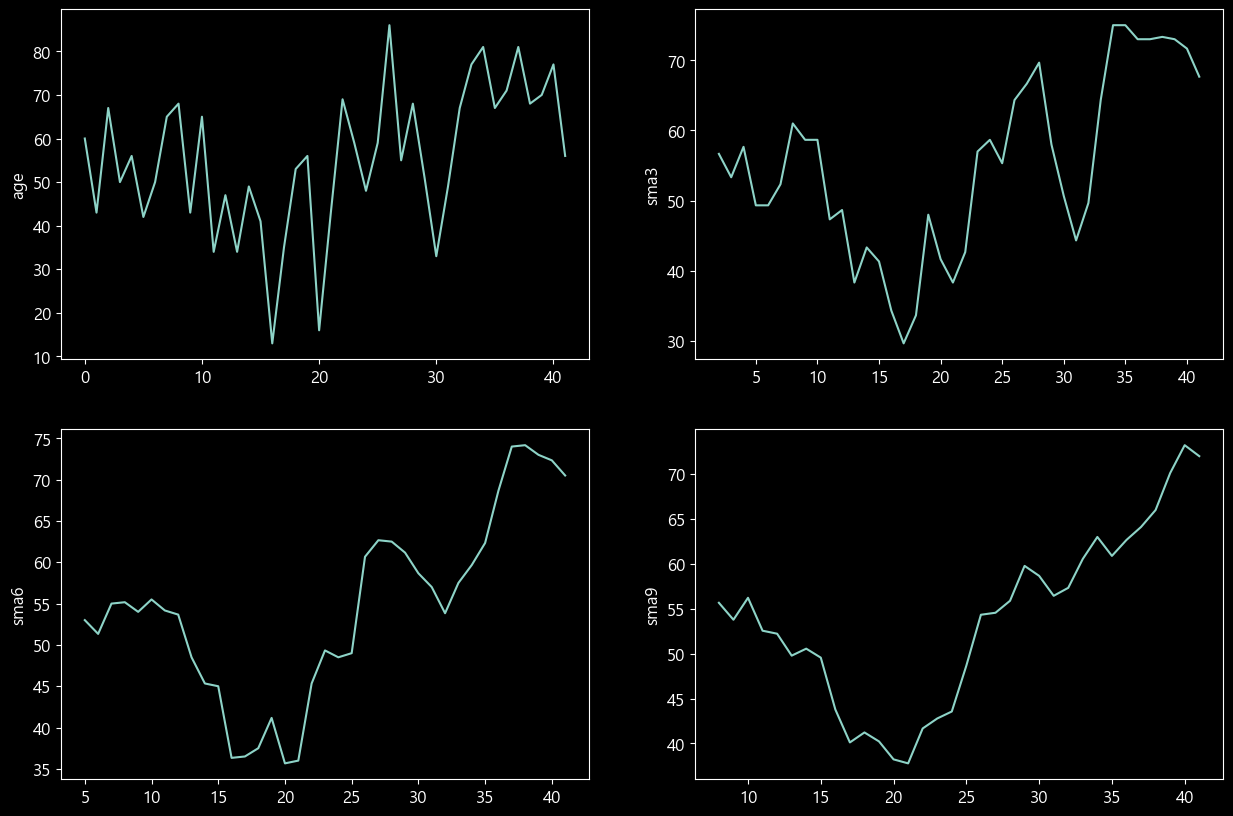

In [7]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
sb.lineplot(df, x=df.index, y='age',ax=ax1)
sb.lineplot(df, x=df.index, y='sma3',ax=ax2)
sb.lineplot(df, x=df.index, y='sma6',ax=ax3)
sb.lineplot(df, x=df.index, y='sma9',ax=ax4)

plt.show()
plt.close()

### 2) 지수 이동 평균(EMA , Exponetial Moving Average)

보다 최근의 값에 가중치를 두면서 이동평균을 계산하는 방법

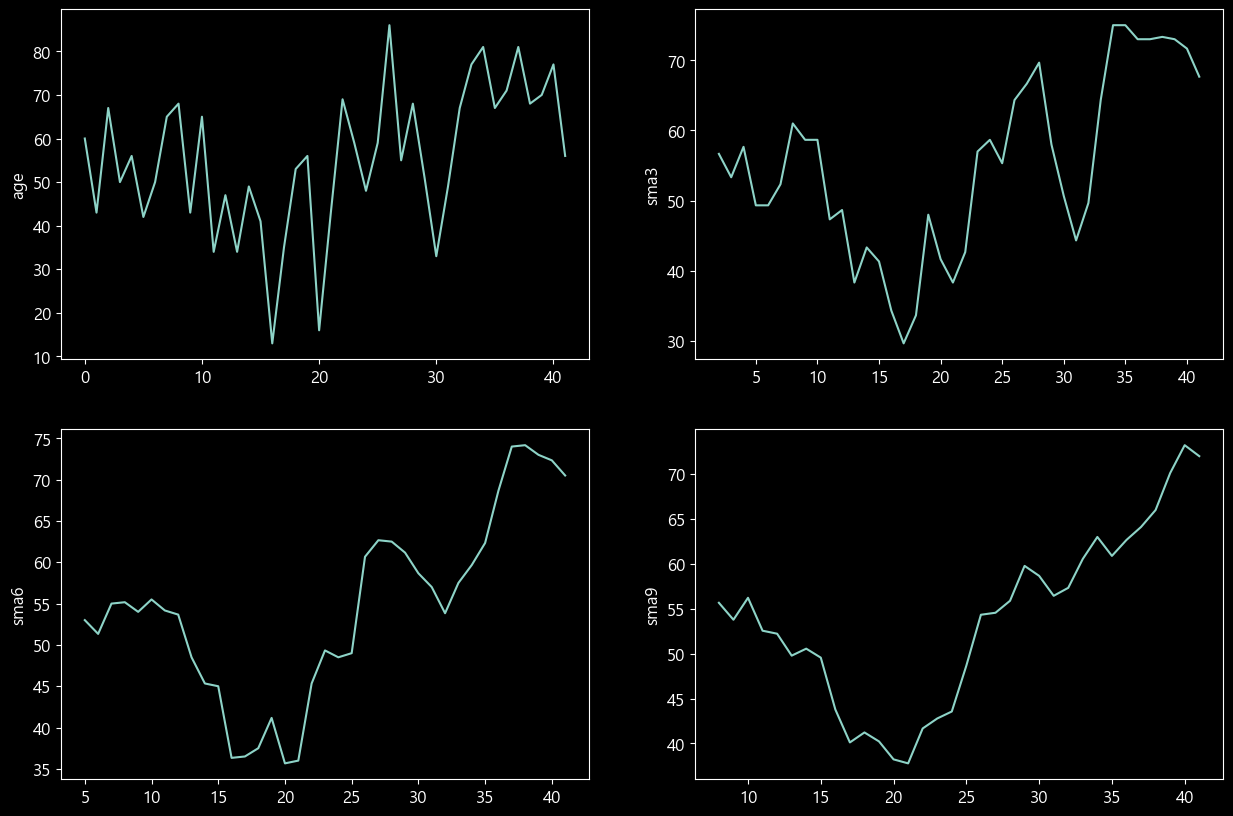

In [8]:
df['ewm3'] = df['age'].ewm(3).mean()
df['ewm3'] = df['age'].ewm(6).mean()
df['ewm3'] = df['age'].ewm(9).mean()

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
sb.lineplot(df, x=df.index, y='age',ax=ax1)
sb.lineplot(df, x=df.index, y='sma3',ax=ax2)
sb.lineplot(df, x=df.index, y='sma6',ax=ax3)
sb.lineplot(df, x=df.index, y='sma9',ax=ax4)

plt.show()
plt.close()

평균이동시각화의 목적은 데이터가 정상성을 만족하는지 확인하여 '차분'적용 여부를 결정하기 위함 (거의 99% 이상이 비정상성)